In [1]:
import pandas as pd

In [2]:
#define the path, please note you need to use your own path info for mall_customers.csv to read the data
customer = pd.read_csv(r'D:\Mitsu\MS-ISM\508 - Data Mining I\Week2\mall_customers.csv')

In [3]:
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
trial= customer.iloc[0, [3,4]].values
print(trial)

[15 39]


In [5]:
# select numerical columns that are used to perform K-means cluster analysis
X= customer.iloc[:, [3,4]].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
#standarddize features
from sklearn.preprocessing import StandardScaler

#create a scaler object of standard scaler
scaler = StandardScaler()

#Apply the scaler object
customer_std = scaler.fit_transform(X)
customer_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

<b>Step 2: Perform K-means cluster analysis</b>

In [8]:
#import library
from sklearn.cluster import KMeans

In [9]:
#use elbow method to find the optimal k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter=300, random_state=0)
    kmeans.fit(customer_std)
    wcss.append(kmeans.inertia_)

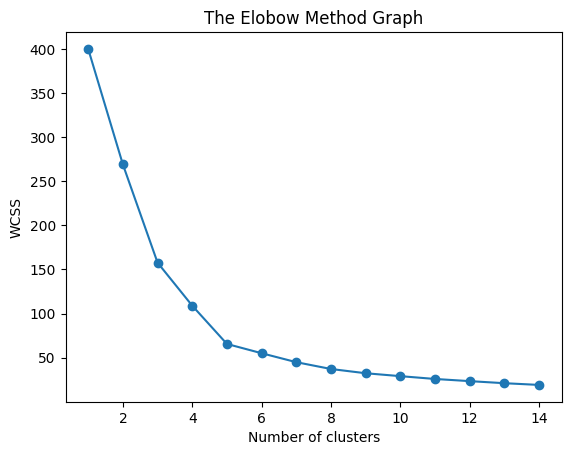

In [10]:
#visulize the elbow visulization
import matplotlib.pyplot as plt

#plt.plot(x, y, marker)
plt.plot(range(1,15), wcss, marker="o")
plt.title('The Elobow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# This is another way to find the optimal k using silhouette score
from sklearn.metrics import silhouette_score

for n_cluster in [4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=n_cluster).fit(customer_std)
    silhouette_avg = silhouette_score(customer_std, kmeans.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

C:\Users\Mitsu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mitsu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mitsu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mitsu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Silhouette Score for 4 Clusters: 0.4939
Silhouette Score for 5 Clusters: 0.5547
Silhouette Score for 6 Clusters: 0.5381
Silhouette Score for 7 Clusters: 0.5281
Silhouette Score for 8 Clusters: 0.4555
Silhouette Score for 9 Clusters: 0.4596
Silhouette Score for 10 Clusters: 0.4387


C:\Users\Mitsu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
#perform k means cluster analysis using 5 clusters
km = KMeans(n_clusters= 5, init= 'k-means++', n_init= 10, max_iter= 300, random_state= 0).fit(customer_std)
km.cluster_centers_

array([[ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

In [13]:
#assign data points to clusters
clusters = km.fit_predict(customer_std)
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [14]:
#create a new column called 'label' to save clusters in the dataset
customer['label'] = clusters
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


<b>Step 3: Interpret and visualize the clusters</b>

In [15]:
# create a dataframe to save the centroids for the clusters in terms of Annual Income and Spending Score
centroids = pd.DataFrame(km.cluster_centers_, columns = ['Annual Income (k$)','Spending Score (1-100)'])
centroids

,Annual Income (k$),Spending Score (1-100)
0,1.055003,-1.284439
1,-0.200913,-0.026456
2,0.991583,1.239503
3,-1.329545,1.132178
4,-1.307519,-1.136965


In [16]:
# add a new column called "cluster" to indicate the index of the clusters for each set of the centroids
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Annual Income (k$),Spending Score (1-100),cluster
0,1.055003,-1.284439,Cluster 0
1,-0.200913,-0.026456,Cluster 1
2,0.991583,1.239503,Cluster 2
3,-1.329545,1.132178,Cluster 3
4,-1.307519,-1.136965,Cluster 4


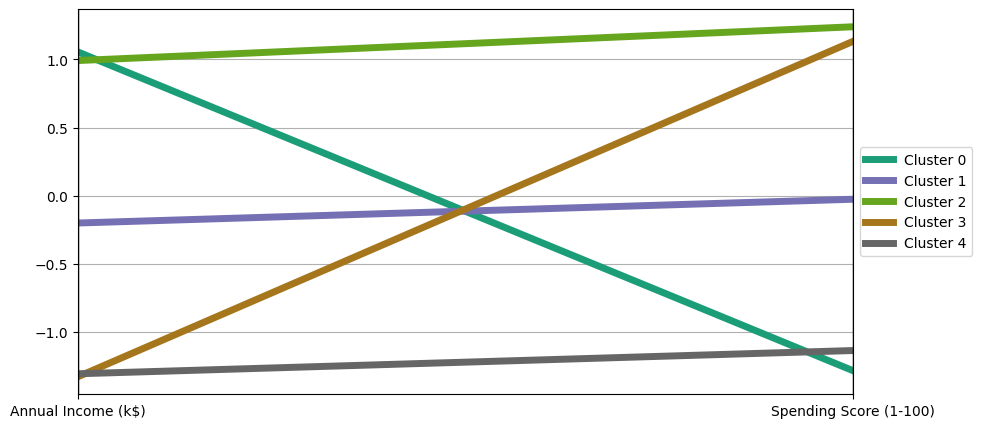

In [17]:
# create parallel coordinates to visualize the centroids for each cluster
#import library
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
#parallel coordinates visualization
plt.figure(figsize=(10,5))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

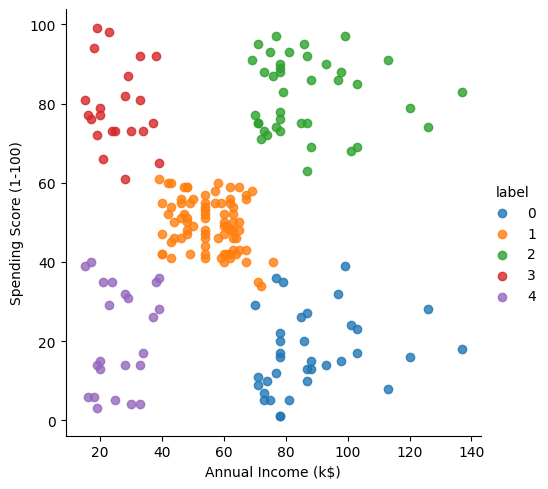

In [18]:
#visualize the clusters using two variables Annual Income and Spending Score
import seaborn as sns
sns.lmplot(data=customer, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label',
fit_reg=False,legend=True)